# comparing models behavior with participants behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
import seaborn as sns 
import ast
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
import warnings
warnings.filterwarnings("ignore")


In [2]:
output_dir = r"25_RL_agent_TDlearn_output_behavior"
os.makedirs(output_dir, exist_ok=True)


folder_path_participants = 'data_risk_added'
folder_path_colors = '21_RL_agent_TDlearn_output/model_behavior'
folder_path_numbers = '22_RL_agent_TDlearn_output/model_behavior'
folder_path_colors_numbers = '23_RL_agent_TDlearn_output/model_behavior'


df_participants = []
df_colors = []
df_numbers = []
df_colors_numbers = []


def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)





for file_name in os.listdir(folder_path_participants):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path_participants, file_name)
        df = pd.read_excel(file_path)
        df = df[df['outcome'].str.lower() != 'na'].reset_index(drop=True)  
        # df = df[len(df) // 2:].reset_index(drop=True)
        df_participants.append(df)

        clean_name = file_name.removeprefix("task_data_").removesuffix(".xlsx")



        find_matching_csv(folder_path_colors, df_colors)
        find_matching_csv(folder_path_numbers, df_numbers)
        find_matching_csv(folder_path_colors_numbers, df_colors_numbers)


In [3]:
df_participants[2]


,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat,risk
0,1067,uniform,894,win,3,9,4575,10.5,0,response,arrowdown,1,0,0.250
1,237,uniform,925,lose,2,1,1903,10.0,1,response,arrowdown,1,0,0.125
2,231,uniform,973,win,8,2,2130,10.5,2,response,arrowup,1,0,0.125
3,602,uniform,768,win,7,2,1537,11.0,3,response,arrowup,1,0,0.250
4,273,uniform,937,win,9,8,1809,11.5,4,response,arrowup,1,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,567,high,787,win,9,7,2580,92.0,128,response,arrowup,4,0,0.000
266,151,low,854,win,6,3,9541,92.5,89,response,arrowup,4,0,0.146
267,178,low,863,win,8,5,1370,93.0,77,response,arrowup,4,0,0.023
268,328,high,770,lose,6,4,1644,92.5,95,response,arrowdown,4,0,0.385


In [4]:
df_colors[2]

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,1,0,9.5,10.5,"[[0.16403211999223194, 0.017228503202055424], ..."
1,0,0,9.0,10.0,"[[-0.037994501591381624, 0.017228503202055424]..."
2,0,1,8.5,10.5,"[[-0.037994501591381624, 0.1641079862247954], ..."
3,0,1,8.0,11.0,"[[-0.037994501591381624, 0.2663005258879596], ..."
4,1,1,8.5,11.5,"[[-0.037994501591381624, 0.3374017780702712], ..."
...,...,...,...,...,...
265,0,1,5.0,92.0,"[[0.10373881891393369, 0.12853838273006676], [..."
266,0,1,4.5,92.5,"[[0.10373881891393369, 0.12853838273006676], [..."
267,1,1,5.0,93.0,"[[0.10373881891393369, 0.12853838273006676], [..."
268,0,0,4.5,92.5,"[[0.10373881891393369, 0.12853838273006676], [..."


In [5]:
df_numbers[2]

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,1,0,9.5,10.5,"[[-0.005781484717304979, -0.000360978904806554..."
1,0,0,9.0,10.0,"[[-0.005781484717304979, -0.000360978904806554..."
2,1,1,9.5,10.5,"[[-0.005781484717304979, -0.000360978904806554..."
3,1,1,10.0,11.0,"[[-0.005781484717304979, -0.000360978904806554..."
4,0,1,9.5,11.5,"[[-0.005781484717304979, -0.000360978904806554..."
...,...,...,...,...,...
265,0,1,37.0,92.0,"[[0.3785880589565343, -0.00036097890480655463]..."
266,1,1,37.5,92.5,"[[0.3785880589565343, -0.00036097890480655463]..."
267,0,1,37.0,93.0,"[[0.3785880589565343, -0.00036097890480655463]..."
268,1,0,37.5,92.5,"[[0.3785880589565343, -0.00036097890480655463]..."


In [6]:
df_colors_numbers[2]

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,1,0,9.5,10.5,"[[[-0.020376703070331587, -0.00073429560613807..."
1,0,0,9.0,10.0,"[[[-0.020376703070331587, -0.00073429560613807..."
2,0,1,8.5,10.5,"[[[-0.020376703070331587, -0.00073429560613807..."
3,1,1,9.0,11.0,"[[[-0.020376703070331587, -0.00073429560613807..."
4,1,1,9.5,11.5,"[[[-0.020376703070331587, -0.00073429560613807..."
...,...,...,...,...,...
265,1,1,58.0,92.0,"[[[0.4960578211356717, -0.0007342956061380753]..."
266,1,1,58.5,92.5,"[[[0.4960578211356717, -0.0007342956061380753]..."
267,0,1,58.0,93.0,"[[[0.4960578211356717, -0.0007342956061380753]..."
268,0,0,57.5,92.5,"[[[0.4960578211356717, -0.0007342956061380753]..."


# total reward:

In [7]:
num_subplots = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 28))
axes = axes.flatten()


colors = ['black', '#8b0000', 'orange', '#5e81ac']
labels = ['participant', 'color', 'number', 'both']

for i in range(num_subplots):
    ax = axes[i]

    ax.plot(range(trial_num), (df_participants[i]['totalReward'] - df_participants[i]['totalReward'].iloc[0] )+10, label=labels[0], color=colors[0], linewidth=3.5)
    ax.plot(range(trial_num), df_colors[i]['model_total_reward'], label=labels[1], color=colors[1])
    ax.plot(range(trial_num), df_numbers[i]['model_total_reward'], label=labels[2], color=colors[2])
    ax.plot(range(trial_num), df_colors_numbers[i]['model_total_reward'], label=labels[3], color=colors[3])

    ax.set_title(f'participant {i}' , fontsize=14, fontweight='bold')
    ax.set_xlabel('trials')
    ax.set_ylabel('total reward')
    ax.legend(frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('total rewards', fontsize=22, fontweight='bold', y=1)

plt.tight_layout(rect=[0, 0, 1, 1]) 

filename = os.path.join(output_dir, "total_reward.pdf")
plt.savefig(filename, format='pdf')

plt.close()


# q-val trends colors model:
I wanna find delta_q vals for arrow up and arrowdown.
 each q_val_number_dist_choice column has q val matrices that are 3 x 2. For 3 uniform, low, high distributions and arrow down and arrow up actions. this is the map from code 11:

distributions_map = { "uniform": 0, "low": 1,  "high": 2}

actions = { "arrowdown": 0, "arrowup": 1}

# attention: I'm looking at q-val (arrowup) - q-val (arrow down)

### first we need to do some preprocessing.

In [8]:
distributions_map = { "uniform": 0, "low": 1,  "high": 2}

actions = { "arrowdown": 0, "arrowup": 1}

down_up_participant_choice = []
delta_q_val_uniform = []
delta_q_val_low = []
delta_q_val_high = []

for df in df_colors:
    temp_vec = np.array(df['participant_choices'], dtype=float)

    temp_vec[temp_vec == 0] = -0.5
    temp_vec[temp_vec == 1] = 0.5
    down_up_participant_choice.append(temp_vec)
    
    delta_uniform = []
    delta_low = []
    delta_high = []
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, actions["arrowup"]] - temp_vec2[:, actions["arrowdown"]]
        delta_uniform.append(delta[distributions_map["uniform"]])
        delta_low.append(delta[distributions_map["low"]])
        delta_high.append(delta[distributions_map["high"]])

    delta_q_val_uniform.append(delta_uniform)
    delta_q_val_low.append(delta_low)
    delta_q_val_high.append(delta_high)
        
    


In [9]:
num_participants = len(df_participants)
trial_num = len(df_participants[0])

# Create subplots: 8 rows, 4 columns (grid for all participant plots)
fig, axes = plt.subplots(nrows=9 * 4, ncols=4, figsize=(20, 45))

axes = np.array(axes).flatten()

vector_data = [down_up_participant_choice, delta_q_val_uniform, delta_q_val_low, delta_q_val_high]

x = np.arange(trial_num)

for i in range(num_participants):
    col = i % 4 
    row_start = (i // 4) * 4  
    
    for j in range(4):  
        ax_index = (row_start + j) * 4 + col  
        ax = axes[ax_index]

        vec = vector_data[j][i]  # get the j-th vector for participant i
        
        ax.plot(x, vec, color=['black', 'gray', 'orange', 'green'][j])


        #  title the top-most subplot in each participant's section only
        if j == 0:
            ax.set_title(f'participant {i}', fontsize=14, fontweight='bold')




fig.suptitle('q-value color model', fontsize=22, fontweight='bold', y =1)
plt.tight_layout()

filename = os.path.join(output_dir, "q_val_color.pdf")
plt.savefig(filename, format='pdf')

plt.close()


# colors model delta q val and choices correlations

In [10]:
down_up_participant_choice = np.array(down_up_participant_choice)

delta_q_val_uniform = np.array(delta_q_val_uniform)
delta_q_val_low = np.array(delta_q_val_low)
delta_q_val_high = np.array(delta_q_val_high)

num_participants = down_up_participant_choice.shape[0]

correlations = np.zeros((num_participants, 3))
correlations_pval = np.zeros((num_participants, 3))

for i in range(num_participants):
    correlations[i, 0] = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_uniform[i, :])[0, 1]
    correlations[i, 1] = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_low[i, :])[0, 1]
    correlations[i, 2] = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_high[i, :])[0, 1]

for i in range(num_participants):
    for j, delta_q_val in enumerate([delta_q_val_uniform, delta_q_val_low, delta_q_val_high]):
        corr, p_val = pearsonr(down_up_participant_choice[i, :], delta_q_val[i, :])
        correlations[i, j] = corr
        correlations_pval[i, j] = p_val


correlations = correlations.T
correlations_pval = correlations_pval.T

annots = np.array([["*" if correlations_pval[j, i] < 0.05 else "" 
                            for i in range(num_participants)] for j in range(3)])


plt.figure(figsize=(18, 1.5))

xticklabels = [f'p{i+1}' for i in range(num_participants)]
yticklabels = ['uniform', 'low', 'high']

sns.heatmap(correlations, cmap='coolwarm', linewidths=0.5,
            xticklabels=xticklabels, yticklabels=yticklabels,
            cbar=True, vmin=-0.4, vmax=0.4,
            cbar_kws={'pad': 0.02}, annot=annots, fmt='')

plt.xlabel("participants")
plt.ylabel("distribution")
plt.title("correlation between Δq-values [q(up)-q(down)] and choice")


plt.tight_layout()

filename = os.path.join(output_dir, "correlation_qVal_choice_colors.pdf")
plt.savefig(filename, format='pdf')

plt.close()


# colors correlations clustering

In [11]:
data = correlations

data = data.T 
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# finding the optimal number of clusters using elbow method and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 10)  # clusters from 2 to 9

for k in k_range: 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_2d)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_2d, labels))

# the best k using the silhouette score
best_k = k_range[np.argmax(silhouette_scores)]

# apply k-means clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_2d)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color = 'gray')
plt.xlabel('number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.title('elbow method')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color = 'gray')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.title('silhouette score')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1, 3, 3)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='rainbow')
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.title(f'k-means clustering (k={best_k})')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


for i, (x, y) in enumerate(data_2d):
    plt.text(x, y, str(i), fontsize=10, fontweight = 'bold', ha='center', va='center', color='black')

filename = os.path.join(output_dir, "correlations_color_clustering.pdf")
plt.savefig(filename, format='pdf')

plt.close()

# q-val trends number model:
I wanna find delta_q vals for arrow up and arrowdown.
 each q_val_number_dist_choice column has q val matrices that are 9x2. 9 numbers and 2 actions: arrow down and arrow up actions.
 remembers that numbers are from 1 to 9, but indices are from 0 8 in q val.

 # preprocessing:

In [12]:
down_up_participant_choice = []
delta_q_val_1 = []
delta_q_val_2 = []
delta_q_val_3 = []
delta_q_val_4 = []
delta_q_val_5 = []
delta_q_val_6 = []
delta_q_val_7 = []
delta_q_val_8 = []
delta_q_val_9 = []

for df in df_numbers:
    temp_vec = np.array(df['participant_choices'], dtype=float)

    temp_vec[temp_vec == 0] = -0.5
    temp_vec[temp_vec == 1] = 0.5
    down_up_participant_choice.append(temp_vec)

    delta_1 = []
    delta_2 = []
    delta_3 = []
    delta_4 = []
    delta_5 = []
    delta_6 = []
    delta_7 = []
    delta_8 = []
    delta_9 = []
    
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, actions["arrowup"]] - temp_vec2[:, actions["arrowdown"]]
        delta_1.append(delta[0])
        delta_2.append(delta[1])
        delta_3.append(delta[2])
        delta_4.append(delta[3])
        delta_5.append(delta[4])
        delta_6.append(delta[5])
        delta_7.append(delta[6])
        delta_8.append(delta[7])
        delta_9.append(delta[8])
        
        

    delta_q_val_1.append(delta_1)
    delta_q_val_2.append(delta_2)
    delta_q_val_3.append(delta_3)
    delta_q_val_4.append(delta_4)
    delta_q_val_5.append(delta_5)
    delta_q_val_6.append(delta_6)
    delta_q_val_7.append(delta_7)
    delta_q_val_8.append(delta_8)
    delta_q_val_9.append(delta_9)
        
    


In [13]:
num_participants = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=9 * 10, ncols=4, figsize=(15, 100))

axes = np.array(axes).flatten()

vector_data = [down_up_participant_choice, delta_q_val_1, delta_q_val_2, 
               delta_q_val_3, delta_q_val_4, delta_q_val_5, delta_q_val_6, 
               delta_q_val_7, delta_q_val_8, delta_q_val_9]

x = np.arange(trial_num)
# color_palette = ['black', 'gray', 'orange', 'green', 'blue', 'red', 'purple', 'brown', 'pink', 'cyan']

for i in range(num_participants):
    col = i % 4  
    row_start = (i // 4) * 10  # startinggggggg row for this participant (now 10 subplots per participant)

    for j in range(10):  
        ax_index = (row_start + j) * 4 + col  #  index for this subplot
        ax = axes[ax_index]

        vec = vector_data[j][i]  #  the j th vector for participant i
        
        ax.plot(x, vec)

        # have title on the top-most subplot for each participant
        if j == 0:
            ax.set_title(f'participant {i}', fontsize=14, fontweight='bold') 
        else:
            ax.set_title(f'{j}', fontsize=12, fontweight='bold') 

fig.suptitle('q value number model', fontsize=22, fontweight='bold', y=1)
plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "q_val_number.pdf")
plt.savefig(filename, format='pdf')

plt.close()


# numbers model delta q val and choices correlations

In [14]:
down_up_participant_choice = np.array(down_up_participant_choice)

delta_q_val_1 = np.array(delta_q_val_1)
delta_q_val_2 = np.array(delta_q_val_2)
delta_q_val_3 = np.array(delta_q_val_3)
delta_q_val_4 = np.array(delta_q_val_4)
delta_q_val_5 = np.array(delta_q_val_5)
delta_q_val_6 = np.array(delta_q_val_6)
delta_q_val_7 = np.array(delta_q_val_7)
delta_q_val_8 = np.array(delta_q_val_8)
delta_q_val_9 = np.array(delta_q_val_9)

num_participants = down_up_participant_choice.shape[0]

# Correlation and p-value arrays
correlations_numbers = np.zeros((num_participants, 9))
correlations_numbers_pval = np.zeros((num_participants, 9))

# Compute correlations and p-values
for i in range(num_participants):
    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_1[i, :])
    correlations_numbers[i, 0] = corr
    correlations_numbers_pval[i, 0] = pval
    
    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_2[i, :])
    correlations_numbers[i, 1] = corr
    correlations_numbers_pval[i, 1] = pval

    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_3[i, :])
    correlations_numbers[i, 2] = corr
    correlations_numbers_pval[i, 2] = pval

    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_4[i, :])
    correlations_numbers[i, 3] = corr
    correlations_numbers_pval[i, 3] = pval

    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_5[i, :])
    correlations_numbers[i, 4] = corr
    correlations_numbers_pval[i, 4] = pval

    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_6[i, :])
    correlations_numbers[i, 5] = corr
    correlations_numbers_pval[i, 5] = pval

    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_7[i, :])
    correlations_numbers[i, 6] = corr
    correlations_numbers_pval[i, 6] = pval

    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_8[i, :])
    correlations_numbers[i, 7] = corr
    correlations_numbers_pval[i, 7] = pval

    corr, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_9[i, :])
    correlations_numbers[i, 8] = corr
    correlations_numbers_pval[i, 8] = pval

# Transpose so participants match columns
correlations_numbers = correlations_numbers.T
correlations_numbers_pval = correlations_numbers_pval.T

# Create annotation array where p<0.05 is marked with '*'
annots = np.array([
    ["*" if correlations_numbers_pval[row, col] < 0.05 else "" 
     for col in range(num_participants)]
    for row in range(9)
])

plt.figure(figsize=(25, 6))
ax = sns.heatmap(
    correlations_numbers,
    cmap='coolwarm',
    linewidths=0.5,
    xticklabels=[f'p{i+1}' for i in range(num_participants)],
    yticklabels=list(range(1, 10)),
    cbar=True,
    vmin=-0.4,
    vmax=0.4,
    annot=annots,  # Add significance asterisks
    fmt=''         # So they appear as just '*'
)

plt.xlabel("participants")
plt.ylabel("numbers")
plt.title("correlation between Δq-values [q(up)-q(down)] and choice")

filename = os.path.join(output_dir, "correlation_qVal_choice_numbers.pdf")
plt.savefig(filename, format='pdf')

plt.close()


# numbers correlation clustering

In [15]:
data = correlations_numbers

data = data.T 
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# finding the optimal number of clusters using elbow method and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 10)  # clusters from 2 to 9

for k in k_range: 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_2d)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_2d, labels))

# the best k using the silhouette score
best_k = k_range[np.argmax(silhouette_scores)]

# apply k-means clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_2d)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color = 'gray')
plt.xlabel('number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.title('elbow method')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color = 'gray')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.title('silhouette score')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.subplot(1, 3, 3)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='rainbow')
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.title(f'k-means clustering (k={best_k})')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


for i, (x, y) in enumerate(data_2d):
    plt.text(x, y, str(i), fontsize=10, fontweight = 'bold', ha='center', va='center', color='black')

filename = os.path.join(output_dir, "correlations_numbers_clustering.pdf")
plt.savefig(filename, format='pdf')

plt.close()


# q-val trends both colors and numbers model:
I wanna find delta_q vals for arrow up and arrowdown. and then find delta q val (up - down)

# preprocessing:

In [16]:
down_up_participant_choice_both = []
delta_q_val_1_both = []
delta_q_val_2_both = []
delta_q_val_3_both = []
delta_q_val_4_both = []
delta_q_val_5_both = []
delta_q_val_6_both = []
delta_q_val_7_both = []
delta_q_val_8_both = []
delta_q_val_9_both = []

for df in df_colors_numbers:
    temp_vec = np.array(df['participant_choices'], dtype=float)
    temp_vec[temp_vec == 0] = -0.5
    temp_vec[temp_vec == 1] = 0.5
    temp_vec = np.stack([temp_vec] * 3, axis=-1)
    # print(np.shape(temp_vec))
    down_up_participant_choice_both.append(temp_vec)

    

    delta_1_both = []
    delta_2_both = []
    delta_3_both = []
    delta_4_both = []
    delta_5_both = []
    delta_6_both = []
    delta_7_both = []
    delta_8_both = []
    delta_9_both = []
    
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, :, actions["arrowup"]].squeeze() - temp_vec2[:, :, actions["arrowdown"]].squeeze()
        delta_1_both.append(delta[0][:])
        delta_2_both.append(delta[1][:])
        delta_3_both.append(delta[2][:])
        delta_4_both.append(delta[3][:])
        delta_5_both.append(delta[4][:])
        delta_6_both.append(delta[5][:])
        delta_7_both.append(delta[6][:])
        delta_8_both.append(delta[7][:])
        delta_9_both.append(delta[8][:])
        
        

    delta_q_val_1_both.append(delta_1_both)
    delta_q_val_2_both.append(delta_2_both)
    delta_q_val_3_both.append(delta_3_both)
    delta_q_val_4_both.append(delta_4_both)
    delta_q_val_5_both.append(delta_5_both)
    delta_q_val_6_both.append(delta_6_both)
    delta_q_val_7_both.append(delta_7_both)
    delta_q_val_8_both.append(delta_8_both)
    delta_q_val_9_both.append(delta_9_both)
        
    


In [17]:
num_participants = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=9 * 10, ncols=4, figsize=(15, 100))

axes = np.array(axes).flatten()

vector_data_both = [down_up_participant_choice_both, delta_q_val_1_both, delta_q_val_2_both, 
               delta_q_val_3_both, delta_q_val_4_both, delta_q_val_5_both, delta_q_val_6_both, 
               delta_q_val_7_both, delta_q_val_8_both, delta_q_val_9_both]

x = np.arange(trial_num)
color_palette = [ 'gray', 'orange', 'green']

for i in range(num_participants):
    col = i % 4  
    row_start = (i // 4) * 10  # startinggggggg row for this participant (now 10 subplots per participant)

    for j in range(10):  
        ax_index = (row_start + j) * 4 + col  #  index for this subplot
        ax = axes[ax_index]

        vec = np.array(vector_data_both[j][i])
        
        ax.plot(x, vec[:,distributions_map["uniform"]], color = 'gray')
        ax.plot(x, vec[:,distributions_map["low"]], color = 'orange')
        ax.plot(x, vec[:,distributions_map["high"]], color = 'green')

        # have title on the top-most subplot for each participant
        if j == 0:
            ax.set_title(f'participant {i}', fontsize=14, fontweight='bold') 
        else:
            ax.set_title(f'{j}', fontsize=12, fontweight='bold') 

fig.suptitle('q value both', fontsize=22, fontweight='bold', y=1)
plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "q_val_both.pdf")
plt.savefig(filename, format='pdf')

plt.close()


# BOTH model delta q val and choices correlations

In [18]:

down_up_participant_choice = np.array(down_up_participant_choice)

delta_q_val_1_both = np.array(delta_q_val_1_both)
delta_q_val_2_both = np.array(delta_q_val_2_both)
delta_q_val_3_both = np.array(delta_q_val_3_both)
delta_q_val_4_both = np.array(delta_q_val_4_both)
delta_q_val_5_both = np.array(delta_q_val_5_both)
delta_q_val_6_both = np.array(delta_q_val_6_both)
delta_q_val_7_both = np.array(delta_q_val_7_both)
delta_q_val_8_both = np.array(delta_q_val_8_both)
delta_q_val_9_both = np.array(delta_q_val_9_both)

num_participants = down_up_participant_choice.shape[0]

# Keep the same shape as before for correlations_both
correlations_both = np.zeros((num_participants, 9, len(distributions_map)))

# Add a matching array for p-values
pvals_both = np.zeros((num_participants, 9, len(distributions_map)))

for i in range(num_participants):
    # number 1
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_1_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 0, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_1_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 0, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_1_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 0, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_1_both[i, :, distributions_map["low"]])
    pvals_both[i, 0, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_1_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 0, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_1_both[i, :, distributions_map["high"]])
    pvals_both[i, 0, distributions_map["high"]] = pval

    # number 2
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_2_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 1, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_2_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 1, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_2_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 1, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_2_both[i, :, distributions_map["low"]])
    pvals_both[i, 1, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_2_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 1, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_2_both[i, :, distributions_map["high"]])
    pvals_both[i, 1, distributions_map["high"]] = pval

    # number 3
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_3_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 2, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_3_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 2, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_3_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 2, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_3_both[i, :, distributions_map["low"]])
    pvals_both[i, 2, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_3_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 2, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_3_both[i, :, distributions_map["high"]])
    pvals_both[i, 2, distributions_map["high"]] = pval

    # number 4
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_4_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 3, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_4_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 3, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_4_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 3, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_4_both[i, :, distributions_map["low"]])
    pvals_both[i, 3, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_4_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 3, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_4_both[i, :, distributions_map["high"]])
    pvals_both[i, 3, distributions_map["high"]] = pval

    # number 5
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_5_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 4, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_5_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 4, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_5_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 4, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_5_both[i, :, distributions_map["low"]])
    pvals_both[i, 4, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_5_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 4, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_5_both[i, :, distributions_map["high"]])
    pvals_both[i, 4, distributions_map["high"]] = pval

    # number 6
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_6_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 5, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_6_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 5, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_6_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 5, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_6_both[i, :, distributions_map["low"]])
    pvals_both[i, 5, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_6_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 5, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_6_both[i, :, distributions_map["high"]])
    pvals_both[i, 5, distributions_map["high"]] = pval

    # number 7
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_7_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 6, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_7_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 6, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_7_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 6, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_7_both[i, :, distributions_map["low"]])
    pvals_both[i, 6, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_7_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 6, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_7_both[i, :, distributions_map["high"]])
    pvals_both[i, 6, distributions_map["high"]] = pval

    # number 8
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_8_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 7, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_8_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 7, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_8_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 7, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_8_both[i, :, distributions_map["low"]])
    pvals_both[i, 7, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_8_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 7, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_8_both[i, :, distributions_map["high"]])
    pvals_both[i, 7, distributions_map["high"]] = pval

    # number 9
    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_9_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_both[i, 8, distributions_map["uniform"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_9_both[i, :, distributions_map["uniform"]])
    pvals_both[i, 8, distributions_map["uniform"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_9_both[i, :, distributions_map["low"]])[0, 1]
    correlations_both[i, 8, distributions_map["low"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_9_both[i, :, distributions_map["low"]])
    pvals_both[i, 8, distributions_map["low"]] = pval

    corr = np.corrcoef(down_up_participant_choice[i, :], delta_q_val_9_both[i, :, distributions_map["high"]])[0, 1]
    correlations_both[i, 8, distributions_map["high"]] = corr
    _, pval = pearsonr(down_up_participant_choice[i, :], delta_q_val_9_both[i, :, distributions_map["high"]])
    pvals_both[i, 8, distributions_map["high"]] = pval



for i in range(num_participants):
    for j, delta_q_val in enumerate([
        delta_q_val_1_both, delta_q_val_2_both, delta_q_val_3_both,
        delta_q_val_4_both, delta_q_val_5_both, delta_q_val_6_both,
        delta_q_val_7_both, delta_q_val_8_both, delta_q_val_9_both
    ]):
        for dist, dist_idx in distributions_map.items():
            x = down_up_participant_choice[i, :]
            y = delta_q_val[i, :, dist_idx]

            # Check if std is zero before computing correlation
            if np.std(x) == 0 or np.std(y) == 0:
                correlations_both[i, j, dist_idx] = 0  # Assign 0 instead of NaN
                pvals_both[i, j, dist_idx] = 1  # Assign p=1 (no significance)
            else:
                corr = np.corrcoef(x, y)[0, 1]
                correlations_both[i, j, dist_idx] = corr
                _, pval = pearsonr(x, y)
                pvals_both[i, j, dist_idx] = pval



fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))
labels = ['uniform', 'low', 'high']

for corr_plot in range(3):
    ax = axes[corr_plot]
    correlations = correlations_both[:, :, corr_plot].T  
    
    # Create an annotation array of asterisks where p < 0.05
    annots = np.empty((9, num_participants), dtype=object)
    for row in range(9):
        for col in range(num_participants):
            if pvals_both[col, row, corr_plot] < 0.05:
                annots[row, col] = '*'
            else:
                annots[row, col] = ''

    sns.heatmap(
        correlations, ax=ax, cmap='coolwarm', linewidths=0.5,
        xticklabels=[f'p{i+1}' for i in range(num_participants)],
        yticklabels=list(range(1, 10)), cbar=True, vmin=-0.4, vmax=0.4,
        annot=annots, fmt=""  # annotations = '*' for p<0.05
    )

    if corr_plot == 1:
        ax.set_ylabel("numbers", fontsize=12, fontweight='bold')
    if corr_plot == 2:
        ax.set_xlabel("participants", fontsize=12, fontweight='bold')

    ax.set_title(f"{labels[corr_plot]}")

fig.suptitle('correlation between Δq-values [q(up)-q(down)] and choice', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

filename = os.path.join(output_dir, "correlation_qVal_choice_both.pdf")
plt.savefig(filename, format='pdf')
plt.close()


# BOTH correlations clutering

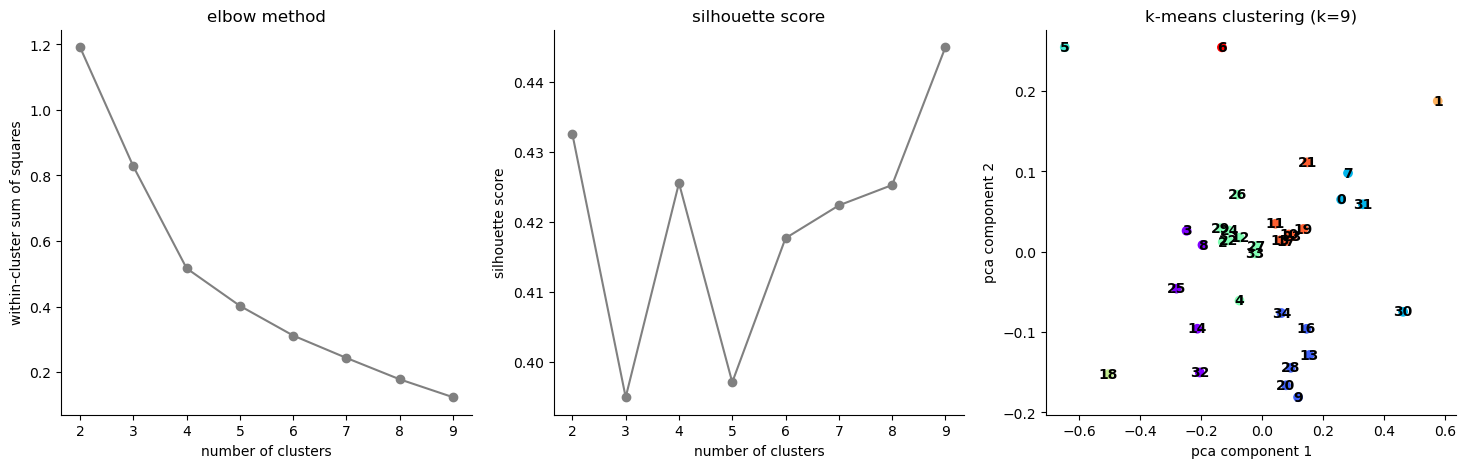

In [19]:
correlations_both_stacked = correlations_both.reshape(num_participants, -1) # stacking 3 colors on top of each other
data = correlations_both_stacked

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# finding the optimal number of clusters using elbow method and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 10)  # clusters from 2 to 9

for k in k_range: 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_2d)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_2d, labels))

# the best k using the silhouette score
best_k = k_range[np.argmax(silhouette_scores)]

# apply k-means clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_2d)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color = 'gray')
plt.xlabel('number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.title('elbow method')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color = 'gray')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.title('silhouette score')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.subplot(1, 3, 3)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='rainbow')
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.title(f'k-means clustering (k={best_k})')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


for i, (x, y) in enumerate(data_2d):
    plt.text(x, y, str(i), fontsize=10, fontweight = 'bold', ha='center', va='center', color='black')

filename = os.path.join(output_dir, "correlations_both_clustering.pdf")
plt.savefig(filename, format='pdf')

# plt.close()


# debug

In [20]:
# print("NaNs in correlations_both:", np.isnan(correlations_both).sum())
# print("NaNs in pvals_both:", np.isnan(pvals_both).sum())


In [21]:
# nan_indices_corr = np.argwhere(np.isnan(correlations_both))
# nan_indices_pvals = np.argwhere(np.isnan(pvals_both))

# print("NaN indices in correlations_both:", nan_indices_corr)
# print("NaN indices in pvals_both:", nan_indices_pvals)


In [22]:
# print("NaNs in down_up_participant_choice:", np.isnan(down_up_participant_choice).sum())

# print("NaNs in delta_q_val_1_both:", np.isnan(delta_q_val_1_both).sum())
# print("NaNs in delta_q_val_2_both:", np.isnan(delta_q_val_2_both).sum())
# print("NaNs in delta_q_val_3_both:", np.isnan(delta_q_val_3_both).sum())
# print("NaNs in delta_q_val_4_both:", np.isnan(delta_q_val_4_both).sum())
# print("NaNs in delta_q_val_5_both:", np.isnan(delta_q_val_5_both).sum())
# print("NaNs in delta_q_val_6_both:", np.isnan(delta_q_val_6_both).sum())
# print("NaNs in delta_q_val_7_both:", np.isnan(delta_q_val_7_both).sum())
# print("NaNs in delta_q_val_8_both:", np.isnan(delta_q_val_8_both).sum())
# print("NaNs in delta_q_val_9_both:", np.isnan(delta_q_val_9_both).sum())


In [23]:
# for i in range(num_participants):
#     for j in range(9):  # Trials
#         for d in ["uniform", "low", "high"]:  # Distribution types
#             dist_index = distributions_map[d]

#             std_x = np.std(down_up_participant_choice[i, :])
#             std_y = np.std(eval(f"delta_q_val_{j+1}_both")[i, :, dist_index])  # Get the correct delta_q_val

#             if std_x == 0 or std_y == 0:
#                 print(f"Zero std for participant {i}, trial {j+1}, distribution {d}: std_x={std_x}, std_y={std_y}")
